<a href="https://colab.research.google.com/github/Mbigdeli2003/Fault-Detection/blob/main/FDA_TEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FDA on TEP

In [5]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
import pandas as panda
import numpy as nump
import matplotlib.pyplot as plot
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
Fault_train=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)
Normal_train=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 train (480x52).xlsx")

Fault_test=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  test  (20x960x52).xlsx") #replace address from drive
Normal_test=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 test (960x52).xlsx") #replace address from drive

In [24]:
x=Fault_train
x

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,2,1,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,3,1,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,4,1,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,20,1,496,0.20006,3708.5,4497.7,9.2167,27.103,42.336,...,53.749,20.049,59.346,15.976,38.463,42.294,44.981,48.511,41.290,21.141
9996,9996,20,1,497,0.31328,3666.5,4483.6,9.2536,26.704,42.172,...,53.607,30.819,60.733,15.283,38.340,38.185,46.823,48.597,41.941,18.724
9997,9997,20,1,498,0.31186,3674.1,4480.6,9.2912,26.986,42.337,...,53.642,30.958,62.280,14.792,38.143,32.580,45.048,48.664,41.112,16.435
9998,9998,20,1,499,0.30026,3690.1,4519.3,9.2301,26.858,42.376,...,53.440,29.814,59.285,14.388,39.685,36.612,43.100,48.896,41.682,18.685


In [33]:
x_selected= Fault_train[(Fault_train.faultNumber==1)|
                                 (Fault_train.faultNumber==3 )|
                                 (Fault_train.faultNumber==5 )|
                                 (Fault_train.faultNumber==7 )|
                                 (Fault_train.faultNumber==9 )|
                                 (Fault_train.faultNumber==11 )|
                                 (Fault_train.faultNumber==13)|
                                 (Fault_train.faultNumber==15 )|
                                 (Fault_train.faultNumber==17)|
                                 (Fault_train.faultNumber==19)]
                                 fnumber=x_selected.iloc[:,1]
x_selected.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
x_selected
x_selected.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)

### Scaling

In [69]:
ff = x_selected
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s = scaler.transform(ff)
df1=pd.DataFrame(tr_s)
dfarray=df1.values
df2=df1.iloc[1000,:]


In [71]:
clf = LinearDiscriminantAnalysis()
X_r2=clf.fit(dfarray, fnumber.values).transform(dfarray)

In [72]:
X_r2.shape

(5000, 9)

In [73]:
y=Fault_test
y_selected= y[(y.faultNumber==1)|
                                 (y.faultNumber==3 )|
                                 (y.faultNumber==5 )|
                                 (y.faultNumber==7 )|
                                 (y.faultNumber==9 )|
                                 (y.faultNumber==11 )|
                                 (y.faultNumber==13)|
                                 (y.faultNumber==15 )|
                                 (y.faultNumber==17)|
                                 (y.faultNumber==19)]

y_selected.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
y_selected.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)
ff = y_selected
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
test = scaler.transform(ff)
testdata=panda.DataFrame(test)


<ipython-input-73-c1fd0cde69a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_selected.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
<ipython-input-73-c1fd0cde69a2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_selected.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',


In [55]:
test.shape

(9600, 34)

In [105]:
LinearDiscriminantAnalysis()
state=np.zeros((5000,1))
for i in range(0,5000,1):
  df2=tr_s[i,:]
  state[i:i+500]=clf.predict([df2])


In [106]:
state.shape

(5000, 1)

In [77]:
state.shape

(500, 1)

In [79]:
plt.plot(state[:,1])

IndexError: ignored

In [110]:
state.shape

(5000, 1)

<ipython-input-112-01c9f7fc6a33>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_faulty_classes_2.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',


[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

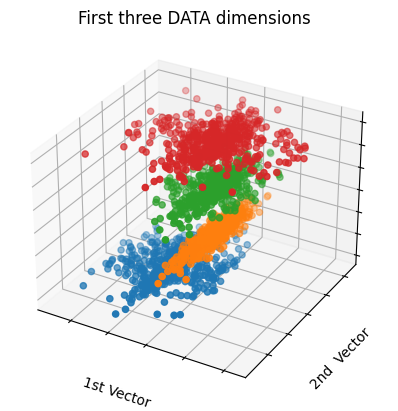

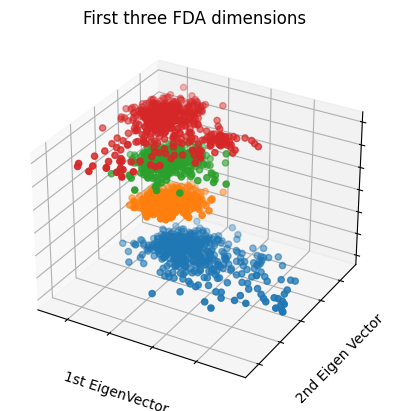

In [112]:
import mpl_toolkits.mplot3d
Fault_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)
our_faulty_classes_2= Fault_train[(Fault_train.faultNumber==1)|
                                 (Fault_train.faultNumber==3 )|
                                 (Fault_train.faultNumber==5 )|
                                 (Fault_train.faultNumber==7 )|
                                 (Fault_train.faultNumber==9 )|
                                 (Fault_train.faultNumber==11 )|
                                 (Fault_train.faultNumber==13)|
                                 (Fault_train.faultNumber==15 )|
                                 (Fault_train.faultNumber==17)|
                                 (Fault_train.faultNumber==19)]
our_faulty_classes_2.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)
n1=2
n2=3
#Determining Classes
Cl_1=0
Cl_2=500
Cl_3=1000
Cl_4=1500
Cl_5=2000
fig = plt.figure(1)
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(tr_s[Cl_1:Cl_2, n1],tr_s[Cl_1:Cl_2, n2],our_faulty_classes_2.iloc[Cl_1:Cl_2,1])
scatter = ax.scatter(tr_s[Cl_2:Cl_3, n1],tr_s[Cl_2:Cl_3, n2],our_faulty_classes_2.iloc[Cl_2:Cl_3,1])
scatter = ax.scatter(tr_s[Cl_3:Cl_4, n1],tr_s[Cl_3:Cl_4, n2],our_faulty_classes_2.iloc[Cl_3:Cl_4,1])
scatter = ax.scatter(tr_s[Cl_4:Cl_5, n1],tr_s[Cl_4:Cl_5, n2],our_faulty_classes_2.iloc[Cl_4:Cl_5,1])
ax.set_title("First three DATA dimensions")
ax.set_xlabel("1st Vector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd  Vector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Vector")
ax.zaxis.set_ticklabels([])
fig = plt.figure(2)
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_r2[Cl_1:Cl_2, n1],X_r2[Cl_1:Cl_2, n2],our_faulty_classes_2.iloc[Cl_1:Cl_2,1])
scatter = ax.scatter(X_r2[Cl_2:Cl_3, n1],X_r2[Cl_2:Cl_3, n2],our_faulty_classes_2.iloc[Cl_2:Cl_3,1])
scatter = ax.scatter(X_r2[Cl_3:Cl_4, n1],X_r2[Cl_3:Cl_4, n2],our_faulty_classes_2.iloc[Cl_3:Cl_4,1])
scatter = ax.scatter(X_r2[Cl_4:Cl_5, n1],X_r2[Cl_4:Cl_5, n2],our_faulty_classes_2.iloc[Cl_4:Cl_5,1])
ax.set_title("First three FDA dimensions")
ax.set_xlabel("1st EigenVector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigen Vector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])